# Análisis de Clustering: K-Means y DBSCAN

## Introducción
En este notebook, realizaremos un análisis de clustering utilizando los algoritmos K-Means y DBSCAN. El objetivo es identificar patrones de agrupación en el flujo peatonal para mejorar la planificación urbana.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

## Configuración de visualización

In [2]:
sns.set(style='whitegrid')

## Cargar datos

In [3]:
data_file = 'data/eda_data.csv'
df = pd.read_csv(data_file)

# K-Means

## Determinación del Número Óptimo de Clusters

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['cord_x', 'cord_y']])

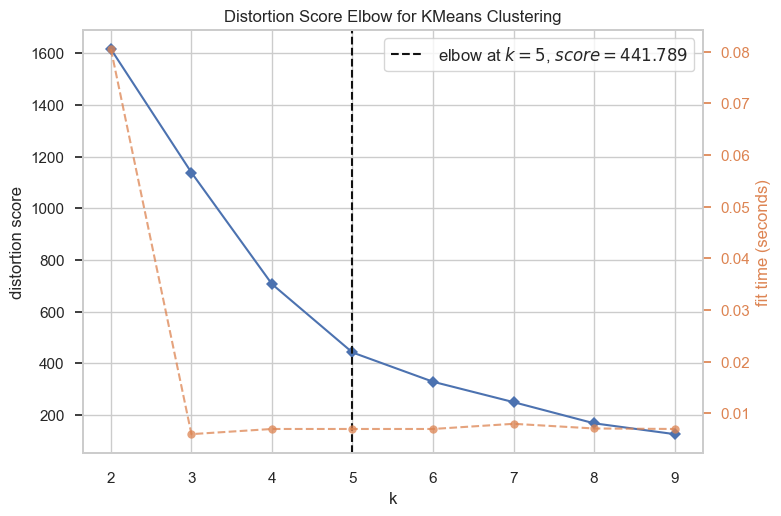

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(scaled_data)
visualizer.show()

## Entrenamiento del Modelo K-Means

In [6]:
optimal_clusters = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_clusters)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

## Evaluación del Modelo K-Means

Silhouette Score para K-Means: 0.5872173143014316


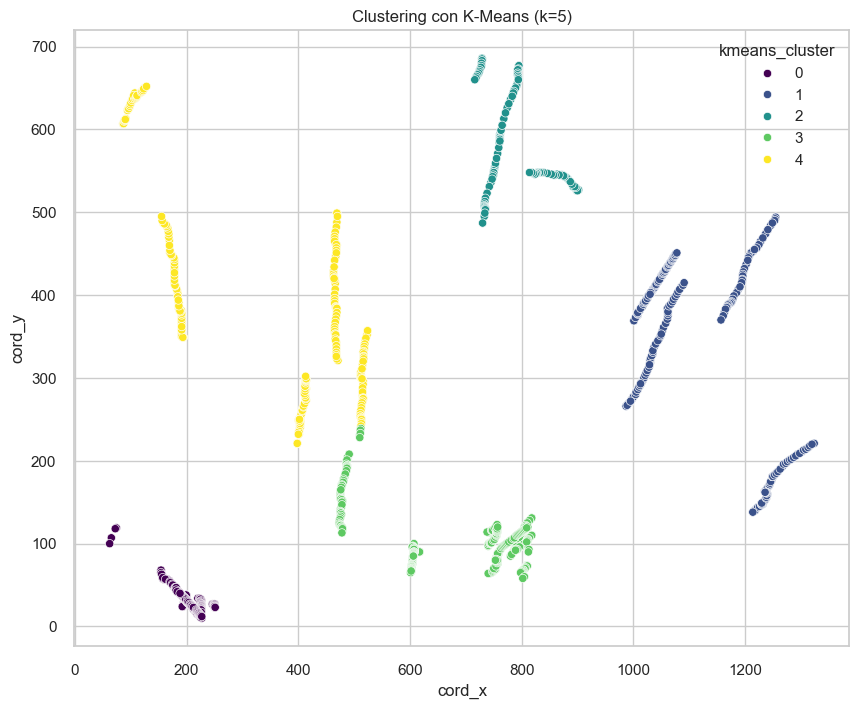

In [7]:
silhouette_avg = silhouette_score(scaled_data, df['kmeans_cluster'])
print(f"Silhouette Score para K-Means: {silhouette_avg}")

plt.figure(figsize=(10, 8))
sns.scatterplot(x='cord_x', y='cord_y', hue='kmeans_cluster', palette='viridis', data=df)
plt.title(f'Clustering con K-Means (k={optimal_clusters})')
plt.show()

# DBSCAN

## Determinación de Parámetros Óptimos para DBSCAN

In [8]:
eps_values = [0.1, 0.2, 0.5, 1, 1.5, 2]
min_samples_values = [5, 10, 20, 50]

best_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_data)
        if len(set(clusters)) > 1:  # Al menos un cluster y ruido
            score = silhouette_score(scaled_data, clusters)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

## Entrenamiento del Modelo DBSCAN

In [9]:
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
df['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

## Evaluación del Modelo DBSCAN

Silhouette Score para DBSCAN: 0.6451285962934543


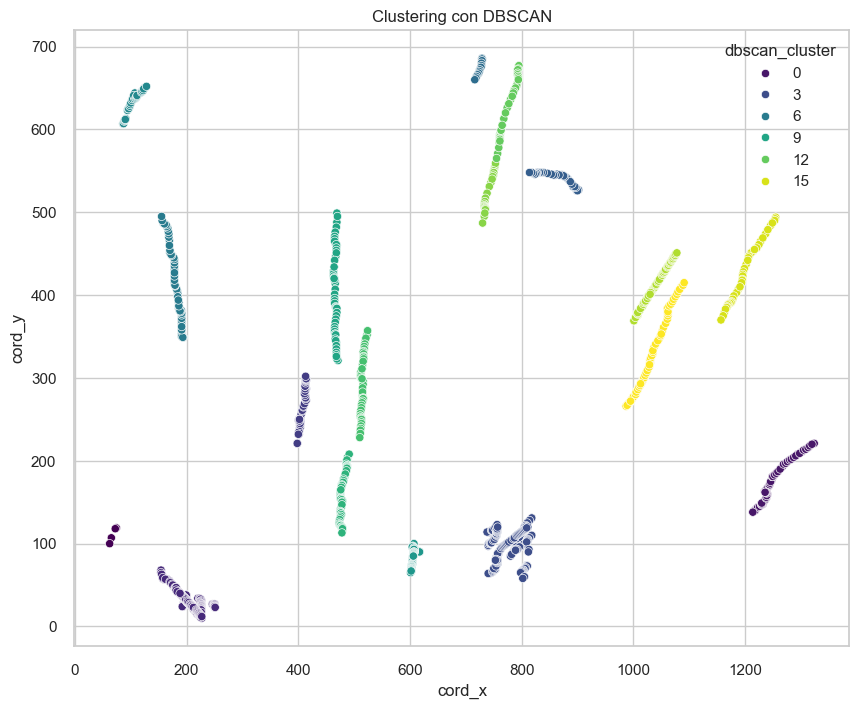

In [10]:
if len(set(df['dbscan_cluster'])) > 1:
    silhouette_avg_dbscan = silhouette_score(scaled_data, df['dbscan_cluster'])
    print(f"Silhouette Score para DBSCAN: {silhouette_avg_dbscan}")

plt.figure(figsize=(10, 8))
sns.scatterplot(x='cord_x', y='cord_y', hue='dbscan_cluster', palette='viridis', data=df)
plt.title(f'Clustering con DBSCAN')
plt.show()

# Conclusiones
En este análisis, hemos aplicado los algoritmos K-Means y DBSCAN para identificar patrones de agrupación en los datos de flujo peatonal. Utilizamos métodos como el Elbow Method para determinar el número óptimo de clusters en K-Means y evaluamos los parámetros óptimos para DBSCAN. Las puntuaciones de Silhouette nos ayudaron a evaluar la calidad de los clusters formados por ambos algoritmos.